<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [40]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme
# J'ai ajouté 3 tests supplementaires au test deja existant.


Test Summary: | Pass  Total  Time
Pas de Cauchy |    1      1  0.1s


Exemple1
Cauchy g1 H1
[0.0, 0.0]

Test Summary: |Time
test g1       | None  0.0s

MyTest 1
Cauchy g2 H2
Solution : [-0.894427190999916, -0.447213595499958]

Test Summary: |Time
test g2       | None  0.0s

MyTest 2
Cauchy g3 H3
Solution : [-0.09455375858660721, -0.032551293939651664]

Test Summary: |Time
test g2       | None  0.0s

MyTest 3
Cauchy g4 H4
Solution : [0.08858315352801555, -0.04640069946705576]


Test Summary: |Time
test g2       | None  0.0s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [41]:
include("../src/Regions_De_Confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes


# Test
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15     15  1.1s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

## Réponses 

**Question 1** :
Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
On remarque que la fonction f1 est égale à son développement de Taylor à l’ordre 2. Avec l'algorithme de Newton, la convergence s'effectue en une seule itération, car dans ce cas, la minimisation se fait directement sur la fonction quadratique. Contrairement à l'algorithme de RC par pas de Cauchy, il nous faut plusieurs itérations pour atteindre le minimum en raison de la nature du codage de l'algorithme de pas de Cauchy. Dans ce cas, l'algorithme de Newton est plus performant que la méthode de RC.

**Question 2** :
Pour tenter d'optimiser les performances de l'algorithme, plusieurs paramètres peuvent être ajustés, tels que $\gamma_1$, $\gamma_2$, $\eta_1$ et $\eta_2$. Ces quatre paramètres ont une influence significative sur notre problème, plus précisément sur $\delta_k$. 

En examinant les étapes de l'algorithme ainsi que les résultats obtenus, on peut constater que $\eta_1$ et $\eta_2$ contribuent à garantir la précision de l'approximation de $f$ par sa série de Taylor (e_k). En revanche, $\gamma_1$ et $\gamma_2$ permettent de réduire ou d'augmenter la zone de confiance en fonction de  l'approximation de $f$ par sa série de Taylor.

On peut s'assurer de l'influence de $\eta_1$ et $\gamma_1$ grâce aux tests suivants: 

|        |     $\eta_1$                               |           $\gamma_1$                        |
|:------:|:------------------------------------------:|:-------------------------------------------:|
|  0.1   | [0.9995107329315351, 0.999017621563244]    |  [0.9998365304709165, 0.999672311601905]    |
|  0.5   | [0.9992578353505274, 0.9985140069946052]   |  [0.9993529197795769, 0.9987042941099483]   |

Analyse des résultats : 
On observe ainsi que lorsque le paramètre $\eta_1$ est augmenté, la convergence de l'algorithme s'accélère. Inversément, si l'on augmente $\gamma_1$, le nombre d'itérations augmente de même.


-------------------------------------------------------------------------
Résultats de : RC pour η1=0.1  appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9995107329315351, 0.999017621563244]
  * f(x_sol) = 2.410499102258117e-7
  * nb_iters = 5000
  * flag     = 3
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC pour η1=0.5 appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9992578353505274, 0.9985140069946052]
  * f(x_sol) = 5.512987745140455e-7
  * nb_iters = 5000
  * flag     = 3
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC pour γ1=0.1  appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9998365304709165, 0.999672311601905]
  * f(x_sol) = 2.678251419493495e-8
  * nb_iters = 3134
  * flag     = 2
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC pour γ1=0.5 appli

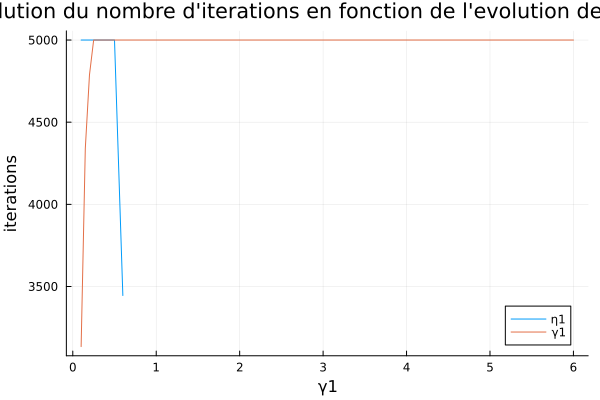

In [42]:
include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")
algo_pas="cauchy"

# Des Tests de η1:
x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x021, η1=0.1,algo_pas="cauchy")
afficher_resultats("RC pour η1=0.1 " , "f2", pts1.x021, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)

x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x021, η1=0.5, algo_pas="cauchy")
afficher_resultats("RC pour η1=0.5" , "f2", pts1.x021, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)

# Des Tests de γ1:
x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x021, γ1=0.1,algo_pas="cauchy")
afficher_resultats("RC pour γ1=0.1 " , "f2", pts1.x021, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)

x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x021, γ1=0.5, algo_pas="cauchy")
afficher_resultats("RC pour γ1=0.5" , "f2", pts1.x021, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)

using Plots

# Des Tests de η1:
η1_values = [0.1, 0.25, 0.5, 0.6]
results_eta = []

for η1 in η1_values
    x_sol, _, _, i, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x021, η1=η1, algo_pas="cauchy")
    push!(results_eta, (η1=η1, iter=i))
end



# Des Tests de γ1:
γ1_values = [0.1, 0.15, 0.2, 0.25, 0.5, 0.57, 0.75, 1, 6]
results_gamma = []

for γ1 in γ1_values
    x_sol, _, _, i, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x021, γ1=γ1, algo_pas="cauchy")
    push!(results_gamma, (γ1=γ1, iter=i))
end

# Créer un graphique
plot()
plot!(η1_values, [result.iter for result in results_eta], label="η1", xlabel="η1", ylabel="iterations")
plot!(γ1_values, [result.iter for result in results_gamma], label="γ1", xlabel="γ1", ylabel="iterations")
title!("Évolution du nombre d'iterations en fonction de l'evolution de η1 et γ1")



# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [43]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [44]:
include("../src/Regions_De_Confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000000000000007, 1.0, 1.0]
  * f(x_sol) = 2.0214560696288428e-30
  * nb_iters = 1
  * flag     = 0
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0, 1.0, 1.0]
  * f(x_sol) = 0.0
  * nb_iters = 3
  * flag     = 0
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9999996743780089, 0.9999993478371609]
  * f(x_sol) = 1.0611413038132374e-13
  * nb_iters = 31
  * flag     = 0
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f2:
  * x0  

## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

## Réponses 

**Question 1** :

Soit la fonction :  $f_2 \colon \mathbb{R}^2 \to \mathbb{R}$
$$
    f_{test}(x_1,x_2) = (x_1/5)^2 + (x_2/3)^2
$$
On applique cette fonction au point initial $x_{021} = \begin{bmatrix}1\\1\end{bmatrix}$, en retournant le dernier itéré admissible à courbure positive, le résultat de la décroissance obtenue montre que quant l'algorithme à effectuer une seule itération, nous observons que l'algorithme de gct génère des solutions identiques à celles du pas de Cauchy.

**Question 2** :

En sortie des resultat, les deux algorithmes fournissent des résultats similaires. Cependant, lorsqu'on évalue la valeur de la fonction à minimiser, notée q, à la solution trouvée pour chaque algorithme, on constate que le minimum calculé avec le gradient conjugué tronqué, sans limiter la boucle à une seule itération, est inférieur à celui obtenu par le pas de Cauchy.

**Question 3** :

Le pas de Cauchy permet une convergence rapide en une seule itération, mais sa décroissance est modérée. En revanche, le gradient conjugué tronqué offre une convergence plus lente tout en assurant une décroissance significative. Le choix entre les deux dépend des compromis entre rapidité et précision dans le contexte global de l'algorithme de région de confiance. Ceci reste valable même pour des fonctions moins lisibles comme fct1 et fct2, et s'applique de manière générale à différentes fonctions.


In [45]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

include("../src/Regions_De_Confiance.jl")

# Test sur fct2(x) = (x[1]/5)^2 + (x[2]/3)^2:
fct2(x) = (x[1]/5)^2 + (x[2]/3)^2
grad_fct2(x) =  [2*x[1]/25; 2*x[2]/9]
hess_fct2(x) = [2/25 0; 2/9 0]
x021 = [1; 1]
sol_exacte_fct2 = [0; 0]

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct2, grad_fct2, hess_fct2, x021, max_iter=1, algo_pas="gct")
afficher_resultats("RC pour gct dans une seule iteration " , "nouvelle f2", pts1.x022, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
println(xs)

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct2, grad_fct2, hess_fct2, x021, max_iter=1, algo_pas="cauchy")
afficher_resultats("RC pour cauchy dans une seule iteration " , "nouvelle f2", pts1.x022, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
println(xs)

# Test 2:

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct2, grad_fct2, hess_fct2, x021, algo_pas="gct")
afficher_resultats("RC pour gct " , "nouvelle f2", pts1.x022, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
println(xs)

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct2, grad_fct2, hess_fct2, x021, algo_pas="cauchy")
afficher_resultats("RC pour cauchy" , "nouvelle f2", pts1.x022, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
println(xs) 

include("../test/fonctions_de_tests.jl") 

# Test sur fct2 du sujet pour:

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x021, max_iter=1, algo_pas="gct")
afficher_resultats("RC pour gct dans une seule iteration " , "f2", pts1.x022, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
println(xs)

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x021, algo_pas="gct")
afficher_resultats("RC pour cauchy" , "f2", pts1.x022, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
println(xs) 

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x021, algo_pas="cauchy")
afficher_resultats("RC pour cauchy" , "f2", pts1.x022, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
println(xs)



-------------------------------------------------------------------------
Résultats de : RC pour gct dans une seule iteration  appliqué à nouvelle f2:
  * x0       = [10, 0]
  * x_sol    = [1, 1]
  * f(x_sol) = 0.1511111111111111
  * nb_iters = 1
  * flag     = 3
  * solution = [0, 0]
[[1, 1]]
-------------------------------------------------------------------------
Résultats de : RC pour cauchy dans une seule iteration  appliqué à nouvelle f2:
  * x0       = [10, 0]
  * x_sol    = [1, 1]
  * f(x_sol) = 0.1511111111111111
  * nb_iters = 1
  * flag     = 3
  * solution = [0, 0]
[[1, 1]]
-------------------------------------------------------------------------
Résultats de : RC pour gct  appliqué à nouvelle f2:
  * x0       = [10, 0]
  * x_sol    = [-6.701726047090169e-6, 1.1002673108614195e-6]
  * f(x_sol) = 1.9310350754487857e-12
  * nb_iters = 37
  * flag     = 2
  * solution = [0, 0]
[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [0.6612805317272583, 0.05911258813127329], [-0.3331641070995197,